In [27]:
# 농어 데이터(길이, 높이, 두께)를 이용한 다항 특성 생성 (4제곱항까지)
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

#데이터 로드
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full.shape)   #원본 데이터 shape 확인

#PolynomialFeatures 객체 생성 (4제곱항까지)
poly = PolynomialFeatures(degree=4, include_bias=False)
poly.fit(perch_full)
perch_poly = poly.transform(perch_full)

# 생성된 특성의 shape 출력
print(perch_poly.shape)


(56, 3)
(56, 34)


In [21]:
#선형회귀 모델을 이용하여 다항 특성 데이터(4제곱항까지) 훈련 및 평가
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

#타깃 데이터(무게)
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

#1번에서 만든 perch_poly 데이터를 훈련/테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_poly, perch_weight, random_state=42)
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

#선형회귀 모델 생성 및 훈련
lr = LinearRegression()
lr.fit(train_input, train_target)

#훈련 및 테스트 점수 출력
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

(42, 34) (14, 34)
(42,) (14,)
0.9995286898074028
-6.786696924886995


In [28]:
#릿지회귀(Ridge)를 이용한 모델 훈련 및 평가
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# 스케일 정규화
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 릿지 회귀 모델 생성 및 훈련
ridge = Ridge()
ridge.fit(train_scaled, train_target)

# 훈련 및 테스트 점수 출력
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9894514463415389
0.9791864810411213


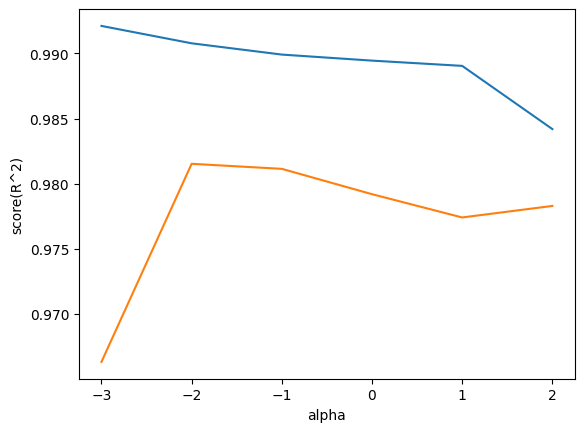

In [29]:
#릿지회귀의 alpha 값을 바꿔가며 훈련/테스트 점수 비교 및 시각화
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('score(R^2)')
plt.show()